In [1]:
# Code aus "Neuronale Netze selbst programmieren,
# ein verständlicher Einstieg mit Python"
# von Tariq Rashid , O'Reilly
# license GPLv2

import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot 
%matplotlib inline
import os
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob
# Importing cv2 // !pip install opencv-python
import cv2
# import random to shuffle array for training
import random

In [191]:
# neural network class definition
class neuralNetwork:

    # initialise the neural network
    def __init__(self, nodesLayerInput, nodesLayerHidden1, nodesLayerHidden2, nodesLayerHidden3, nodesLayerOutput, learningrate):
        # set number of nodes in each layer
        self.inodes = nodesLayerInput
        self.h1nodes = nodesLayerHidden1
        self.h2nodes = nodesLayerHidden2
        self.h3nodes = nodesLayerHidden3
        self.onodes = nodesLayerOutput

        # learning rate
        self.lr = learningrate

        # link weight matrices
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        ##self.wih1 = numpy.random.normal(0.0, pow(self.h1nodes, -0.5), (self.h1nodes, self.inodes))
        ##self.wh1h2 = numpy.random.normal(0.0, pow(self.h2nodes, -0.5), (self.h2nodes, self.h1nodes))
        ##self.wh2h3 = numpy.random.normal(0.0, pow(self.h3nodes, -0.5), (self.h3nodes, self.h2nodes))
        ##self.wh3o = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.h3nodes))
        
        self.wih1 = (numpy.random.rand(self.h1nodes, self.inodes) - 0.5)
        self.wh1h2 = (numpy.random.rand(self.h2nodes, self.h1nodes) - 0.5)
        self.wh2h3 = (numpy.random.rand(self.h3nodes, self.h2nodes) - 0.5)
        self.wh3o = (numpy.random.rand(self.onodes, self.h3nodes) - 0.5)

        print("train wh3o: ",self.wh3o[0][0:3].flatten())

        # acitivation function is the sigmoid funciton
        self.activation_function = lambda x: scipy.special.expit(x)
    
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden1_inputs = numpy.dot(self.wih1, inputs)
        # calculate the signals emerging from hidden layer
        hidden1_outputs = self.activation_function(hidden1_inputs)
                
        # calculate signals into hidden layer
        hidden2_inputs = numpy.dot(self.wh1h2, hidden1_outputs)
        # calculate the signals emerging from hidden layer
        hidden2_outputs = self.activation_function(hidden2_inputs)
                
        # calculate signals into hidden layer
        hidden3_inputs = numpy.dot(self.wh2h3, hidden2_outputs)
        # calculate the signals emerging from hidden layer
        hidden3_outputs = self.activation_function(hidden3_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.wh3o, hidden3_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden3_errors = numpy.dot(self.wh3o.T, output_errors)
        hidden2_errors = numpy.dot(self.wh2h3.T, hidden3_errors)
        hidden1_errors = numpy.dot(self.wh1h2.T, hidden2_errors)
        
        # update the weights for the links between the hidden and output layers
        self.wh3o += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden3_outputs))
         # update the weights for the links between the hidden and output layers
        self.wh2h3 += self.lr * numpy.dot((hidden3_errors * hidden3_outputs * (1.0 - hidden3_outputs)), numpy.transpose(hidden2_outputs))
         # update the weights for the links between the hidden and output layers
        self.wh1h2 += self.lr * numpy.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), numpy.transpose(hidden1_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih1 += self.lr * numpy.dot((hidden1_errors * hidden1_outputs * (1.0 - hidden1_outputs)), numpy.transpose(inputs))
        ##print("train wh3o: ",self.wh3o[0][0:3].flatten())

        print("train wh3o: ",final_outputs[0:3].flatten())

        pass

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden1_inputs = numpy.dot(self.wih1, inputs)
        # calculate the signals emerging from hidden layer
        hidden1_outputs = self.activation_function(hidden1_inputs)
                
        # calculate signals into hidden layer
        hidden2_inputs = numpy.dot(self.wh1h2, hidden1_outputs)
        # calculate the signals emerging from hidden layer
        hidden2_outputs = self.activation_function(hidden2_inputs)
                
        # calculate signals into hidden layer
        hidden3_inputs = numpy.dot(self.wh2h3, hidden2_outputs)
        # calculate the signals emerging from hidden layer
        hidden3_outputs = self.activation_function(hidden3_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.wh3o, hidden3_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        print("query hidden_output: ",hidden1_outputs[0:3].flatten())
        return final_outputs


In [192]:
# number of input, hidden and output nodes
imageAxis = 150
input_nodes = imageAxis**2
hidden1_nodes = 1000
hidden2_nodes = 200
hidden3_nodes = 10
output_nodes = 2

# learning rate
learning_rate = 0.5

# create instance of neural network
n = neuralNetwork(input_nodes, hidden1_nodes, hidden2_nodes, hidden3_nodes, output_nodes, learning_rate)

train wh3o:  [-0.17562976 -0.03464935 -0.28998504]


In [193]:
# https://stackoverflow.com/questions/7165749/open-file-in-a-relative-location-in-python
# relative path to files
fileDir = os.path.dirname(os.path.realpath('__file__'))
# For accessing the file in the parent folder of the current folder
# small test data for quick calculations
training_data_path = os.path.join(fileDir, '../../trainingdata/testdata/train_small/*.jpg') 
test_data_path = os.path.join(fileDir, '../../trainingdata/testdata/test_small/*.jpg') 
# real test data (60'000 training data / 10'000 test data)


In [194]:
# load training data in a list
training_data_list = []

# load all images from the folder
for image_file_name in glob.glob(training_data_path):
    
    # get image from path
    originalImage = cv2.imread(image_file_name)
    # resize the image with openCv2
    resizedImage = cv2.resize(originalImage, (imageAxis, imageAxis), interpolation=cv2.INTER_NEAREST)
    # gray the image
    resizedGrayImage = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)
    
    # use the filename to set the correct label
    if image_file_name.__contains__('cat.'):
        labelCatOrDog = 0
    else:
        labelCatOrDog = 1
    
    # load image data into an array
    print ("loading ... ", image_file_name)
    img_array = resizedGrayImage.flatten()
    
    # reshape from resized to input_nodes value, invert values
    img_data  = 255.0 - img_array.reshape(input_nodes)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    # append label and image data training data set
    record = numpy.append(labelCatOrDog,img_data)
    training_data_list.append(record)
    pass

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.0.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.1.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.10.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.100.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.101.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.102.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.103.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.104.j

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.199.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.2.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.20.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.200.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.201.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.202.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.203.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.204

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.305.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.306.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.307.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.308.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.309.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.31.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.310.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.3

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.409.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.41.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.410.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.411.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.412.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.413.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.414.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.4

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.64.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.65.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.66.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.67.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.68.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.69.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.7.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.70.jpg
l

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.162.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.163.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.164.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.165.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.166.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.167.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.168.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.254.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.255.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.256.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.257.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.258.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.259.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.26.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.2

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.351.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.352.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.353.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.354.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.355.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.356.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.357.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.450.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.451.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.452.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.453.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.454.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.455.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.456.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.93.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.94.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.95.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.96.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.97.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.98.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.99.jpg


In [195]:
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 1

for e in range(epochs):
    # shuffel the training_data_list so we do not go: cat cat cat ... dog dog dog
    random.shuffle(training_data_list)
    
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        # 
        inputs = record[1:]
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(record[0])] = 0.99
        n.train(inputs, targets)
        ##print("trained a picture ", targets, inputs[0:3])
        pass
    pass

train wh3o:  [0.63623771 0.6096687 ]
train wh3o:  [0.40925449 0.69732133]
train wh3o:  [0.37981112 0.71507891]
train wh3o:  [0.38808736 0.65173996]
train wh3o:  [0.35844716 0.66495699]
train wh3o:  [0.3947622  0.63074085]
train wh3o:  [0.45862123 0.61415873]
train wh3o:  [0.41025985 0.62763308]
train wh3o:  [0.38393212 0.64593663]
train wh3o:  [0.36187272 0.66365912]
train wh3o:  [0.33949159 0.67598951]
train wh3o:  [0.37589626 0.64546722]
train wh3o:  [0.40771595 0.60813618]
train wh3o:  [0.38508398 0.6304432 ]
train wh3o:  [0.36491928 0.6515135 ]
train wh3o:  [0.40035662 0.61805333]
train wh3o:  [0.37814976 0.63966274]
train wh3o:  [0.35795915 0.6580756 ]
train wh3o:  [0.33514107 0.66994005]
train wh3o:  [0.3179322  0.68419238]
train wh3o:  [0.35168526 0.65272229]
train wh3o:  [0.38579895 0.6182749 ]
train wh3o:  [0.36592827 0.64055339]
train wh3o:  [0.34664372 0.65912376]
train wh3o:  [0.33031007 0.67662504]
train wh3o:  [0.31682202 0.69405916]
train wh3o:  [0.347802   0.65959996]
t

train wh3o:  [0.48570604 0.51254255]
train wh3o:  [0.45677198 0.54171863]
train wh3o:  [0.48971775 0.50971185]
train wh3o:  [0.51981359 0.47918609]
train wh3o:  [0.54709484 0.45039666]
train wh3o:  [0.51636106 0.48329974]
train wh3o:  [0.48584725 0.51352735]
train wh3o:  [0.51632567 0.48323154]
train wh3o:  [0.48645282 0.51356274]
train wh3o:  [0.45825617 0.54277591]
train wh3o:  [0.48970625 0.509959  ]
train wh3o:  [0.51884598 0.47960201]
train wh3o:  [0.48942929 0.50969747]
train wh3o:  [0.46151205 0.53913845]
train wh3o:  [0.43489268 0.5668468 ]
train wh3o:  [0.41010674 0.59241955]
train wh3o:  [0.38737952 0.61574676]
train wh3o:  [0.42101369 0.5805391 ]
train wh3o:  [0.39736192 0.60491706]
train wh3o:  [0.37580583 0.62708789]
train wh3o:  [0.35629396 0.64719142]
train wh3o:  [0.38942714 0.61222309]
train wh3o:  [0.42306032 0.5771356 ]
train wh3o:  [0.45606198 0.54274554]
train wh3o:  [0.48760905 0.51004958]
train wh3o:  [0.45946332 0.53924891]
train wh3o:  [0.49061147 0.50672431]
t

train wh3o:  [0.50372402 0.50357813]
train wh3o:  [0.50411079 0.50312711]
train wh3o:  [0.50374927 0.50351645]
train wh3o:  [0.50399268 0.50298937]
train wh3o:  [0.50363843 0.50336721]
train wh3o:  [0.5032247  0.50378055]
train wh3o:  [0.50261482 0.50420324]
train wh3o:  [0.50167647 0.50470686]
train wh3o:  [0.50282097 0.50412852]
train wh3o:  [0.50339683 0.50366321]
train wh3o:  [0.50374597 0.50325053]
train wh3o:  [0.50343025 0.50360622]
train wh3o:  [0.50300999 0.50397812]
train wh3o:  [0.50345719 0.50355102]
train wh3o:  [0.5030733  0.50390881]
train wh3o:  [0.50253601 0.50431294]
train wh3o:  [0.5031782  0.50388021]
train wh3o:  [0.503503   0.50345144]
train wh3o:  [0.50318907 0.50379363]
train wh3o:  [0.5035049  0.50339785]
train wh3o:  [0.50323311 0.50374938]
train wh3o:  [0.502846   0.50411369]
train wh3o:  [0.50228042 0.50453765]
train wh3o:  [0.50134545 0.50505304]
train wh3o:  [0.49983836 0.5058579 ]
train wh3o:  [0.50185882 0.50491739]
train wh3o:  [0.50268553 0.50434645]
t

train wh3o:  [0.50049977 0.50066535]
train wh3o:  [0.50061311 0.50036548]
train wh3o:  [0.50071338 0.5000728 ]
train wh3o:  [0.50061827 0.50036497]
train wh3o:  [0.50071811 0.50007341]
train wh3o:  [0.5006232  0.50036601]
train wh3o:  [0.50072208 0.50007715]
train wh3o:  [0.50081164 0.49978494]
train wh3o:  [0.50089384 0.49949355]
train wh3o:  [0.50081497 0.49978737]
train wh3o:  [0.5008952  0.49948296]
train wh3o:  [0.50081987 0.49979797]
train wh3o:  [0.50090045 0.499491  ]
train wh3o:  [0.50082444 0.49981112]
train wh3o:  [0.50074149 0.50010886]
train wh3o:  [0.5006514  0.50038746]
train wh3o:  [0.50055227 0.50065519]
train wh3o:  [0.50065483 0.50038868]
train wh3o:  [0.50074665 0.50012125]
train wh3o:  [0.50083074 0.49984407]
train wh3o:  [0.50090328 0.49953932]
train wh3o:  [0.50097296 0.49922574]
train wh3o:  [0.50103621 0.49890421]
train wh3o:  [0.50111632 0.49863777]
train wh3o:  [0.50139629 0.49868105]
train wh3o:  [0.50103702 0.4986018 ]
train wh3o:  [0.50123253 0.49852279]
t

train wh3o:  [0.50055607 0.49938058]
train wh3o:  [0.50054731 0.49928141]
train wh3o:  [0.50054136 0.49917565]
train wh3o:  [0.50054659 0.49928737]
train wh3o:  [0.50056641 0.49939062]
train wh3o:  [0.50054475 0.4992912 ]
train wh3o:  [0.50055038 0.49939312]
train wh3o:  [0.50055814 0.49948838]
train wh3o:  [0.50056952 0.49957974]
train wh3o:  [0.50058756 0.49967251]
train wh3o:  [0.50056529 0.49957234]
train wh3o:  [0.50057664 0.49966395]
train wh3o:  [0.50059482 0.4997539 ]
train wh3o:  [0.50057266 0.49966079]
train wh3o:  [0.50058573 0.49974489]
train wh3o:  [0.50060295 0.49983515]
train wh3o:  [0.5006437  0.49995604]
train wh3o:  [0.50058549 0.49981357]
train wh3o:  [0.50058382 0.49972102]
train wh3o:  [0.50057958 0.4996355 ]
train wh3o:  [0.50058487 0.49971986]
train wh3o:  [0.50058667 0.49980141]
train wh3o:  [0.50058216 0.4998777 ]
train wh3o:  [0.50059065 0.49980587]
train wh3o:  [0.50058947 0.49972498]
train wh3o:  [0.50059268 0.49980858]
train wh3o:  [0.50059091 0.49972699]
t

In [196]:
# load test data in a list
test_data_list = []

# load all images from the folder
for image_file_name in glob.glob(test_data_path):
    
    # get image from path
    originalImage = cv2.imread(image_file_name)
    # resize the image with openCv2
    resizedImage = cv2.resize(originalImage, (imageAxis, imageAxis), interpolation=cv2.INTER_NEAREST)
    # gray the image
    resizedGrayImage = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)
    
    # use the filename to set the correct label
    if image_file_name.__contains__('cat.'):
        labelCatOrDog = 0
    else:
        labelCatOrDog = 1
    
    # load image data into an array
    print ("loading ... ", image_file_name)
    img_array = resizedGrayImage.flatten()
    
    # reshape from resized to input_nodes value, invert values
    img_data  = 255.0 - img_array.reshape(input_nodes)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    # append label and image data training data set
    record = numpy.append(labelCatOrDog,img_data)
    test_data_list.append(record)
    
    pass

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12490.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12491.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12492.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12493.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12494.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12495.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.12496.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_smal

In [197]:
# test the neural network
# scorecard for how well the network performs
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # correct answer is first value
    correct_label = int(record[0])
    inputs = record[1:]
    # query the network
    outputs = n.query(inputs)
    ## print ("score outputs: ",outputs.flatten())

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass
print(scorecard)

query hidden_output:  [1.00000000e+00 9.17195109e-74 1.09272331e-54]
query hidden_output:  [1.00000000e+00 8.08759390e-77 2.28983294e-66]
query hidden_output:  [1.00000000e+00 9.65842473e-82 2.38780536e-76]
query hidden_output:  [1.00000000e+00 3.10780728e-95 5.54991187e-82]
query hidden_output:  [1.00000000e+00 6.35962582e-72 2.47815208e-58]
query hidden_output:  [1.00000000e+00 5.18790336e-63 2.13653819e-52]
query hidden_output:  [1.00000000e+00 1.65528928e-62 7.73997710e-52]
query hidden_output:  [1.00000000e+00 3.97211332e-85 2.33395433e-62]
query hidden_output:  [1.00000000e+00 1.98168479e-58 6.19763821e-61]
query hidden_output:  [1.00000000e+00 5.27470559e-69 3.01857964e-58]
query hidden_output:  [1.00000000e+00 6.87303703e-57 4.60381503e-48]
query hidden_output:  [1.00000000e+000 1.54306167e-116 2.23838197e-099]
query hidden_output:  [1.00000000e+00 2.42547189e-80 4.87850240e-69]
query hidden_output:  [1.00000000e+00 7.63021536e-72 1.94474211e-52]
query hidden_output:  [1.000000

In [198]:
# calculate the performance score (correct answers/ all answers)
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.5


query hidden_output:  [1.00000000e+00 8.08759390e-77 2.28983294e-66]
[0.50062599 0.49900493]
network says  0
match!


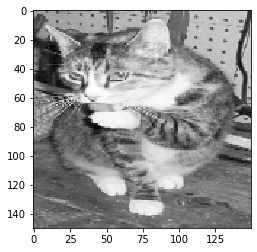

In [199]:
# test the neural network with the test image but only one and show the image

# record to test
item = 1

# plot image
matplotlib.pyplot.imshow(test_data_list[item][1:].reshape(imageAxis,imageAxis), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = test_data_list[item][0]
# data is remaining values
inputs = test_data_list[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs.flatten())

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

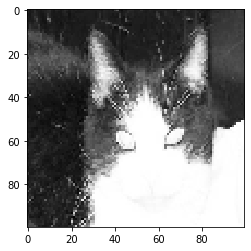

In [11]:
# plot image
matplotlib.pyplot.imshow(training_data_list[5][1:].reshape(imageAxis,imageAxis), cmap='Greys', interpolation='None')
